In [1]:
!pip install pandas
!pip install numpy
!pip install xlrd
!pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [6]:
# Task 1-4
import pandas as pd
import numpy as np
from IPython.display import display

energy = pd.read_excel('En_In.xls', skiprows=17, skipfooter=38)

# Task 1
# You should NOT include information from the bottom and top rows of the data file. 
# The first two columns are not needed, so they should be excluded from the dataframe and the column labels should be changed to read:
# ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable'].

# Drop the first two columns, rename the columns to the required names
energy = energy.iloc[:, 2:]  # Exclude the first two columns
energy.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']

# Task 2
# Convert the data from the 'Energy Supply' column to gJ (Note: 1PJ = 1000000 GJ). 
# For all countries with missing data (e.g., data from “.....”), make sure that this is displayed as np.NaN.

# Convert 'Energy Supply' to numeric and from PJ to GJ
# Convert non-numeric values to NaN and multiply valid numbers by 1e6
energy['Energy Supply'] = pd.to_numeric(energy['Energy Supply'], errors='coerce')
energy['Energy Supply'] = energy['Energy Supply'] * 1000000

# Replace missing data (.....) with np.NaN
energy.replace('.....', np.nan, inplace=True)

# Task 3
# Rename the following list of countries:
# “Republic of Korea": “South Korea”,
# “United States of America": “United States”, ”
# United Kingdom of Great Britain and Northern Ireland": “United Kingdom”,
# “China, Hong Kong Special Administrative Region": “Hong Kong”
country_replacements = {
    "Republic of Korea": "South Korea",
    "United States of America": "United States",
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
    "China, Hong Kong Special Administrative Region": "Hong Kong"
}

# Task 4
# There are also several countries that have numbers and/or brackets in their names. 
# Be sure to remove them, e.g. 'Bolivia (Plurinational State of)' should be 'Bolivia', 'Switzerland17' should be Switzerland'.

# Regular expression to clean country names with numbers and text in parentheses
energy['Country'] = energy['Country'].replace(country_replacements)
energy['Country'] = energy['Country'].str.replace(r'\d+', '', regex=True)
energy['Country'] = energy['Country'].str.replace(r'\s*\(.*\)', '', regex=True)

filtered_countries = energy.loc[energy['Country'].isin(['American Samoa', 'South Korea', 'Bolivia'])]
display(filtered_countries)

,Country,Energy Supply,Energy Supply per Capita,% Renewable
3,American Samoa,NaN,...,0.641026
24,Bolivia,3.360000e+08,32,31.477120
164,South Korea,1.100700e+10,221,2.279353


In [16]:
# Task 5
# Next, download the GDP data from the file “gpd.csv” containing the World Bank's GDP data for countries from 1960 to 2015. 
# Be sure not to include the header in the dataframe and rename the following list of countries:
# “Korea, Rep.” “South Korea”,
# “Iran, Islamic Rep.": “Iran”,
# “Hong Kong SAR, China": “Hong Kong”
import pandas as pd
from IPython.display import display

gdp = pd.read_csv('gdp.csv', skiprows=4)

# Filter the columns to ensure we only keep necessary ones
# The correct structure starts from 'Country Name' up to '2015'
gdp = gdp.loc[:, 'Country Name':'2015']

# Rename the columns to match the required format
gdp.columns = ['Country', 'Country Code', 'Indicator Name', 'Indicator Code'] + [str(year) for year in range(1960, 2016)]

# Rename specific countries as per the instructions
country_replacements = {
    "Korea, Rep.": "South Korea",
    "Iran, Islamic Rep.": "Iran",
    "Hong Kong SAR, China": "Hong Kong"
}
gdp['Country'] = gdp['Country'].replace(country_replacements)

pd.set_option('display.max_columns', None)  # Show all columns

display(gdp.head(1))

,Country,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN


In [18]:
# Task 6
# Download the data from the file “scimagojr.xlsx”, which categorizes countries based on 
# their publications in energy engineering and energy technology journals.
import pandas as pd
from IPython.display import display

scimago = pd.read_excel('scimagojr.xlsx')

display(scimago.head())

,Rank,Country,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
0,1,China,127050,126767,597237,411683,4.70,138
1,2,United States,96661,94747,792274,265436,8.20,230
2,3,Japan,30504,30287,223024,61554,7.31,134
3,4,United Kingdom,20944,20357,206091,37874,9.84,139
4,5,Russian Federation,18534,18301,34266,12422,1.85,57


In [20]:
# Task 7
# Join the three data sets from tasks 1-6 to a new data set (using the intersection of country names). 
# - Use only the GDP data for the last 10 years (2006-2015) and only the top 15 countries in the Scimagojr ranking (Rank to 15). ) 
# and only the top 15 countries according to the Scimagojr ranking (Rank from 1 to 15) 
# - The index of this DataFrame should be the country name and the columns should be 
# ['Rank', 'Documents', 'Cited documents', 'Citations', 'Self-citations', 'Citations per document', 'H index', 
# 'Energy Supply', 'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']. 
# You should get a DataFrame with 15 rows and 20 columns.
import pandas as pd
import numpy as np
from IPython.display import display

energy = pd.read_excel('En_In.xls', skiprows=17, skipfooter=38)

# Drop the first two columns and rename the remaining ones
energy = energy.iloc[:, 2:]  
energy.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']

# Convert Energy Supply from PJ to GJ
energy['Energy Supply'] = pd.to_numeric(energy['Energy Supply'], errors='coerce')
energy['Energy Supply'] *= 1e6

# Replace ..... with NaN
energy.replace('.....', np.nan, inplace=True)

# Clean and rename country names
country_replacements_energy = {
    "Republic of Korea": "South Korea",
    "United States of America": "United States",
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
    "China, Hong Kong Special Administrative Region": "Hong Kong"
}
energy['Country'] = energy['Country'].replace(country_replacements_energy, regex=True)
energy['Country'] = energy['Country'].str.replace(r'\d+', '', regex=True)
energy['Country'] = energy['Country'].str.replace(r'\s*\(.*\)', '', regex=True)


gdp = pd.read_csv('gdp.csv', skiprows=4)

# Keep columns related to the last 10 years (2006-2015)
gdp = gdp.loc[:, ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'] + [str(year) for year in range(2006, 2016)]]
gdp.columns = ['Country', 'Country Code', 'Indicator Name', 'Indicator Code'] + [str(year) for year in range(2006, 2016)]

# Rename countries in GDP dataset
country_replacements_gdp = {
    "Korea, Rep.": "South Korea",
    "Iran, Islamic Rep.": "Iran",
    "Hong Kong SAR, China": "Hong Kong"
}
gdp['Country'] = gdp['Country'].replace(country_replacements_gdp)

scimago = pd.read_excel('scimagojr.xlsx')

# Filter only the top 15 countries from the Scimago rankings
scimago_top15 = scimago[scimago['Rank'] <= 15]

# Merge datasets using the intersection of country names
# Merge Energy data with Scimago data (on Country)
energy_scimago_merged = pd.merge(scimago_top15, energy, how='inner', on='Country')

# Merge the result with GDP data (on Country)
final_merge = pd.merge(energy_scimago_merged, gdp, how='inner', on='Country')

# Set the index to Country and keep the specific columns for the final DataFrame
final_columns = ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 
                 'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', 
                 '% Renewable'] + [str(year) for year in range(2006, 2016)]

result = final_merge.set_index('Country')[final_columns]

display(result)

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93,19.754910,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286,11.570980,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149,10.232820,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124,10.600470,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214,17.288680,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296,61.945430,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165,17.901530,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26,14.969080,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166,17.020280,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12


In [23]:
# Task 8
# Create a function to determine the average GDP of countries over the last 10 years. 
# This function should return a Series object with 15 countries and their average GDP, sorted in descending order.
def average_gdp(df):
    # SeGDP columns from 2006 to 2015
    gdp_columns = [str(year) for year in range(2006, 2016)]
    
    # Calculate the mean GDP for each country
    avg_gdp = df[gdp_columns].mean(axis=1)  # axis=1 - mean should be calculated across the columns for each row
    
    avg_gdp_sorted = avg_gdp.sort_values(ascending=False)
    
    # Format to the desired format
    avg_gdp_sorted = avg_gdp_sorted.apply(lambda x: f"{x:.3f}")
    
    return avg_gdp_sorted

average_gdp_result = average_gdp(result)
print(average_gdp_result)

Country
United States         15364344302990.000
China                  6348608932836.100
Japan                  5542207638235.176
Germany                3493025339072.848
France                 2681724635761.589
United Kingdom         2487906661418.417
Brazil                 2189794143774.905
Italy                  2120175089933.776
India                  1769297396603.860
Canada                 1660647466307.512
Russian Federation     1565459478480.661
Spain                  1418078278145.694
Australia              1164042729991.427
South Korea            1106714508244.852
Iran                    444155754051.095
dtype: object


In [25]:
# Task 9
# Create a function to determine how much the GDP has changed over the past 10 years for a country with the 5th average GDP.
# This function should return a tuple with the name of the country and the value by which the GDP has changed.
def gdp_change_for_5th(df):
    # Get the average GDP for the countries, sorted in descending order from previous task
    avg_gdp = average_gdp(df)
    
    # 5th highest average GDP
    fifth_country = avg_gdp.index[4]
    
    # GDP values for 2006 and 2015 for this country
    gdp_2006 = df.loc[fifth_country, '2006']
    gdp_2015 = df.loc[fifth_country, '2015']
    
    # The change in GDP (2015 GDP - 2006 GDP)
    gdp_change = gdp_2015 - gdp_2006
    
    return (fifth_country, float(gdp_change))

gdp_change_result = gdp_change_for_5th(result)
print(gdp_change_result)

('France', 153345695364.24023)


In [17]:
# Task 10
# Create a function to determine which country has a maximum renewable energy (% Renewable) and what percentage. 
# This function should return a tuple with the name of the country and the percentage.
def max_renewable_energy(df):
    # country with the maximum % Renewable
    max_renewable_country = df['% Renewable'].idxmax()
    
    # maximum renewable percentage
    max_renewable_percentage = df['% Renewable'].max()
    
    return (max_renewable_country, float(max_renewable_percentage))

max_renewable_result = max_renewable_energy(result)
print(max_renewable_result)

('Brazil', 69.64803)


In [26]:
# Task 11
# Create a column that estimates the population. Use Energy Supply and Energy Supply per capita to find the estimate. 
# Which country is the sixth highest in this estimate? 
# This function should return a tuple with the country name and population
def sixth_highest_energy_supply(df):
    # Estimate the population
    df['Population'] = df['Energy Supply'] / df['Energy Supply per Capita']
    
    # Sort by Energy Supply in descending order
    df_sorted = df.sort_values(by='Energy Supply', ascending=False)
    
    # Find the country with the 6th highest Energy Supply
    sixth_country = df_sorted.iloc[5]
    
    country_name = sixth_country.name
    population = sixth_country['Population']
    
    return (country_name, population)

sixth_highest_result = sixth_highest_energy_supply(result)
print(sixth_highest_result)

('Germany', 80369696.96969697)


In [25]:
# Task 12
# Create a column that estimates the number of cited documents per person. 
# What is the relationship between the number of cited documents per capita and energy supply per capita? Use the .corr () method (Pearson correlation). 
# This function should return one number
def cited_docs_energy_correlation(df):
    # Estimate the cited documents per person
    df['Cited Documents per Capita'] = df['Citations'] / df['Population']
    
    # The Pearson correlation between Cited Documents per Capita and Energy Supply per Capita
    correlation = df['Cited Documents per Capita'].corr(df['Energy Supply per Capita'])
    
    return correlation

correlation_result = cited_docs_energy_correlation(result)
print(correlation_result)

0.6668248468590926


In [26]:
# Task 13
# Create a new column with 1 if the country's % Renewable is equal to or above the median for all countries, 
# and 0 if the country's % Renewable is below the median. 
# This function should return a Series with the country name as its index, sorted in ascending order of Rank
def renewable_above_median(df):
    # Calculate the median of the '% Renewable' values
    renewable_median = df['% Renewable'].median()
    
    # Create a new column with 1 if % Renewable >= median, otherwise 0
    df['Renewable Above Median'] = (df['% Renewable'] >= renewable_median).astype(int)
    
    # Sort the DataFrame by Rank in ascending order
    df_sorted = df.sort_values(by='Rank')
    
    return df_sorted['Renewable Above Median']

renewable_median_result = renewable_above_median(result)
print(renewable_median_result)

Country
China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                1
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Name: Renewable Above Median, dtype: int64


In [34]:
# Task 14
# Use the following dictionary to group countries by continent, then create a DataFrame that displays 
# the sample size (number of countries on each continent), as well as the sum, mean, 
# and standard deviation to estimate the population for each country.
# This function should return a DataFrame with an index named Continent 
# ['Asia', 'Australia', 'Europe', 'North America', 'South America'] and columns ['size', 'sum', 'mean', 'std'].
ContinentDict = {'China':'Asia', 'United States':'North America', 'Japan':'Asia', 'United Kingdom':'Europe', 'Russian Federation':'Europe', 'Canada':'North America', 'Germany':'Europe', 'India':'Asia', 'France':'Europe', 'South Korea':'Asia', 'Italy':'Europe', 'Spain':'Europe', 'Iran':'Asia', 'Australia':'Australia', 'Brazil':'South America'}

def continent_population_stats(df, continent_dict):
    # Create a new column 'Continent' based on the mapping from ContinentDict
    df['Continent'] = df.index.to_series().map(continent_dict)
    
    # Group by 'Continent' and calculate the required statistics
    population_stats = df.groupby('Continent')['Population'].agg(
        sample_size='count', 
        population_sum='sum', 
        population_mean='mean', 
        population_std='std'
    )

    # Convert numerical columns to string with 3 decimal places
    population_stats['population_sum'] = population_stats['population_sum'].apply(lambda x: f"{x:.3f}")
    population_stats['population_mean'] = population_stats['population_mean'].apply(lambda x: f"{x:.3f}")
    population_stats['population_std'] = population_stats['population_std'].apply(lambda x: f"{x:.3f}" if pd.notnull(x) else x)
    
    return population_stats

population_stats_result = continent_population_stats(result, ContinentDict)
print(population_stats_result)

               sample_size  population_sum population_mean population_std
Continent                                                                
Asia                     5  2898666386.611   579733277.322  679097888.366
Australia                1    23316017.316    23316017.316            NaN
Europe                   6   457929667.216    76321611.203   34647667.066
North America            2   352855249.480   176427624.740  199669644.857
South America            1   205915254.237   205915254.237            NaN


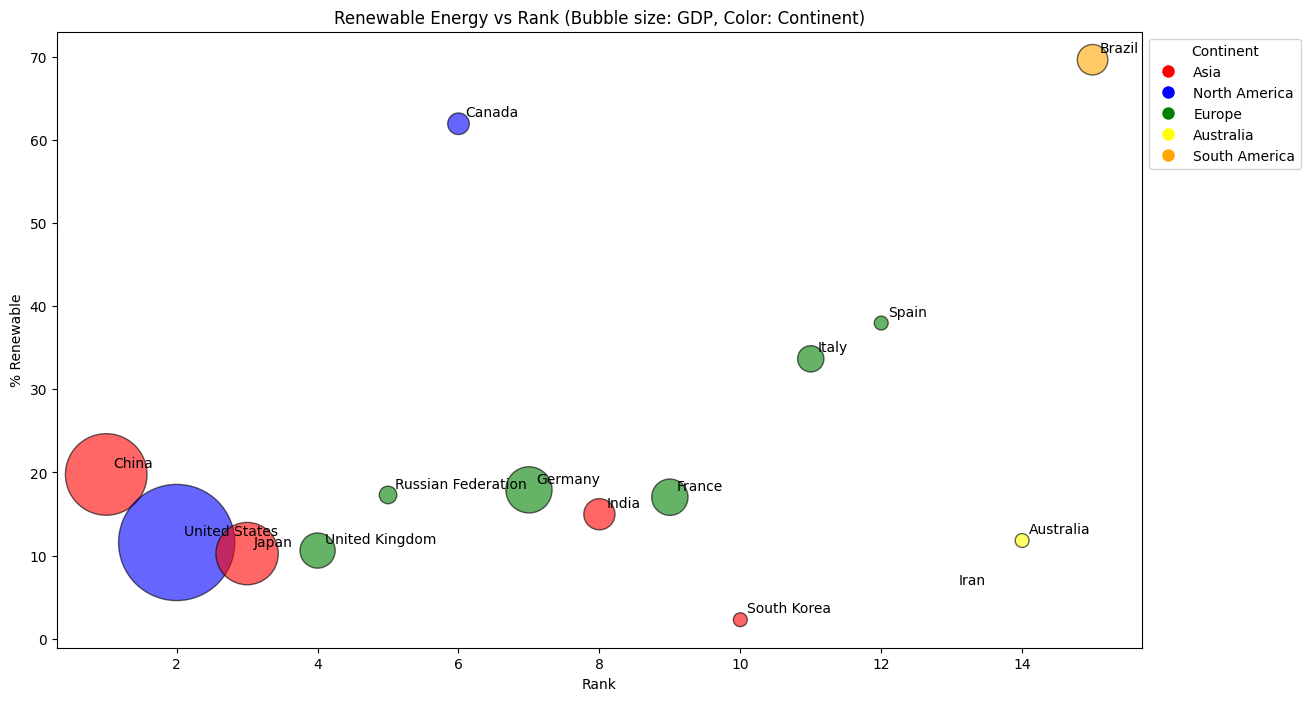

In [27]:
# Task 15
# Create a bubble diagram showing the dependence of % renewable sources on the country's rank (% Renewable vs. Rank). 
# The size of the bubble corresponds to the GDP of the countries in 2015, and the color corresponds to the continent.

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import display

energy = pd.read_excel('En_In.xls', skiprows=17, skipfooter=38)

# Drop the first two columns and rename the remaining ones
energy = energy.iloc[:, 2:]  
energy.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']

# Convert Energy Supply from PJ to GJ
energy['Energy Supply'] = pd.to_numeric(energy['Energy Supply'], errors='coerce')
energy['Energy Supply'] *= 1e6

# Replace ..... with NaN
energy.replace('.....', np.nan, inplace=True)

# Clean and rename country names
country_replacements_energy = {
    "Republic of Korea": "South Korea",
    "United States of America": "United States",
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
    "China, Hong Kong Special Administrative Region": "Hong Kong"
}
energy['Country'] = energy['Country'].replace(country_replacements_energy, regex=True)
energy['Country'] = energy['Country'].str.replace(r'\d+', '', regex=True)
energy['Country'] = energy['Country'].str.replace(r'\s*\(.*\)', '', regex=True)


gdp = pd.read_csv('gdp.csv', skiprows=4)

# Keep columns related to the last 10 years (2006-2015)
gdp = gdp.loc[:, ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'] + [str(year) for year in range(2006, 2016)]]
gdp.columns = ['Country', 'Country Code', 'Indicator Name', 'Indicator Code'] + [str(year) for year in range(2006, 2016)]

# Rename countries in GDP dataset
country_replacements_gdp = {
    "Korea, Rep.": "South Korea",
    "Iran, Islamic Rep.": "Iran",
    "Hong Kong SAR, China": "Hong Kong"
}
gdp['Country'] = gdp['Country'].replace(country_replacements_gdp)

scimago = pd.read_excel('scimagojr.xlsx')

# Filter only the top 15 countries from the Scimago rankings
scimago_top15 = scimago[scimago['Rank'] <= 15]

# Merge datasets using the intersection of country names
# Merge Energy data with Scimago data (on Country)
energy_scimago_merged = pd.merge(scimago_top15, energy, how='inner', on='Country')

# Merge the result with GDP data (on Country)
final_merge = pd.merge(energy_scimago_merged, gdp, how='inner', on='Country')

# Set the index to Country and keep the specific columns for the final DataFrame
final_columns = ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 
                 'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', 
                 '% Renewable'] + [str(year) for year in range(2006, 2016)]

result = final_merge.set_index('Country')[final_columns]



ContinentDict = {'China':'Asia', 'United States':'North America', 'Japan':'Asia', 'United Kingdom':'Europe', 'Russian Federation':'Europe', 'Canada':'North America', 'Germany':'Europe', 'India':'Asia', 'France':'Europe', 'South Korea':'Asia', 'Italy':'Europe', 'Spain':'Europe', 'Iran':'Asia', 'Australia':'Australia', 'Brazil':'South America'}

# Create a new figure and axis
fig, ax = plt.subplots(figsize=(14, 8))

# Create a color map for continents
continent_colors = {'Asia': 'red', 'North America': 'blue', 'Europe': 'green', 
                    'Australia': 'yellow', 'South America': 'orange'}

# Get the GDP values for 2015
gdp_2015 = result['2015']

# Normalize GDP values for bubble sizes, but ensure a minimum size
size_scale = 7000
min_size = 100
sizes = (gdp_2015 - gdp_2015.min()) / (gdp_2015.max() - gdp_2015.min()) * size_scale
sizes = sizes.clip(lower=min_size)

# Create a color array based on continents
colors = [continent_colors.get(ContinentDict.get(country, 'Unknown'), 'gray') for country in result.index]

# Create the scatter plot
scatter = ax.scatter(result['Rank'], result['% Renewable'], s=sizes, c=colors, alpha=0.6, edgecolors='black')

# Annotate each point with the country name
for idx, country in enumerate(result.index):
    ax.annotate(country, (result['Rank'].iloc[idx], result['% Renewable'].iloc[idx]), xytext=(5, 5), textcoords='offset points')

# Set labels and title
ax.set_xlabel('Rank')
ax.set_ylabel('% Renewable')
ax.set_title('Renewable Energy vs Rank (Bubble size: GDP, Color: Continent)')

# Add a legend for continents
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=continent,
                   markerfacecolor=color, markersize=10)
                   for continent, color in continent_colors.items()]
ax.legend(handles=legend_elements, title='Continent', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

# Iran doesn't have a bubble because there is no 2015 gdp data 